In [1]:
import pandas as pd
df = pd.read_parquet("parquets/detection_results_train_chunk_1.parquet")

In [2]:
df

,filename,classid,score,x1,y1,x2,y2
1000000,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.458957,814,232,883,411
1000001,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.456145,240,199,288,245
1000002,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.451958,485,218,547,293
1000003,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.418150,386,217,456,294
1000004,/workspace/yolo_v8_training/oiv7_full/train/14...,1,0.815698,888,199,963,261
...,...,...,...,...,...,...,...
1999995,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.829114,843,530,920,599
1999996,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.781220,771,555,868,646
1999997,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.588591,419,11,592,152
1999998,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.365393,265,120,444,267


In [3]:
# Mapping of values
mapping = {0: 'person', 1: 'head', 2: 'hand', 3: 'face'}

# Apply the mapping
df['label'] = df['classid'].map(mapping)

In [4]:
df

,filename,classid,score,x1,y1,x2,y2,label
1000000,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.458957,814,232,883,411,person
1000001,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.456145,240,199,288,245,person
1000002,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.451958,485,218,547,293,person
1000003,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.418150,386,217,456,294,person
1000004,/workspace/yolo_v8_training/oiv7_full/train/14...,1,0.815698,888,199,963,261,head
...,...,...,...,...,...,...,...,...
1999995,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.829114,843,530,920,599,head
1999996,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.781220,771,555,868,646,head
1999997,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.588591,419,11,592,152,head
1999998,/workspace/yolo_v8_training/oiv7_full/train/2c...,1,0.365393,265,120,444,267,head


In [5]:
# List of values to filter by
filter_list = ['person', 'face']

# Filtering the DataFrame
df = df[df['label'].isin(filter_list)]
df

,filename,classid,score,x1,y1,x2,y2,label
1000000,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.458957,814,232,883,411,person
1000001,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.456145,240,199,288,245,person
1000002,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.451958,485,218,547,293,person
1000003,/workspace/yolo_v8_training/oiv7_full/train/14...,0,0.418150,386,217,456,294,person
1000026,/workspace/yolo_v8_training/oiv7_full/train/14...,3,0.568953,889,221,929,258,face
...,...,...,...,...,...,...,...,...
1999986,/workspace/yolo_v8_training/oiv7_full/train/2c...,0,0.751862,339,321,688,683,person
1999987,/workspace/yolo_v8_training/oiv7_full/train/2c...,0,0.691257,157,425,473,682,person
1999988,/workspace/yolo_v8_training/oiv7_full/train/2c...,0,0.672664,244,20,705,548,person
1999989,/workspace/yolo_v8_training/oiv7_full/train/2c...,0,0.660165,757,550,971,682,person


In [6]:
# threshold_score = 0.6

# # Filtering the DataFrame based on the threshold
# df = df[df['score'] > threshold_score]
# df

In [7]:
grouped_df = df.groupby('filename')

In [8]:
agg_df = grouped_df.agg(lambda x: list(x))
agg_df = agg_df.reset_index()

In [9]:
agg_df

,filename,classid,score,x1,y1,x2,y2,label
0,/workspace/yolo_v8_training/oiv7_full/train/14...,"[0, 0, 0, 0, 3]","[0.45895668864250183, 0.45614486932754517, 0.4...","[814, 240, 485, 386, 889]","[232, 199, 218, 217, 221]","[883, 288, 547, 456, 929]","[411, 245, 293, 294, 258]","[person, person, person, person, face]"
1,/workspace/yolo_v8_training/oiv7_full/train/14...,"[0, 0, 0, 0, 0]","[0.7901296615600586, 0.7552701830863953, 0.720...","[666, 79, 812, 771, 35]","[603, 622, 587, 592, 647]","[709, 154, 862, 814, 80]","[652, 692, 638, 645, 692]","[person, person, person, person, person]"
2,/workspace/yolo_v8_training/oiv7_full/train/14...,"[0, 0, 0, 0, 0, 3, 3, 3, 3, 3]","[0.9440020322799683, 0.906907320022583, 0.9057...","[713, 367, 140, 0, 525, 281, 65, 785, 594, 467]","[403, 408, 393, 387, 399, 431, 426, 449, 428, ...","[974, 579, 409, 224, 764, 344, 145, 858, 655, ...","[1024, 1022, 1024, 1024, 1003, 513, 520, 531, ...","[person, person, person, person, person, face,..."
3,/workspace/yolo_v8_training/oiv7_full/train/14...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.8385299444198608, 0.8308837413787842, 0.773...","[539, 711, 937, 227, 417, 160, 282, 397, 108, ...","[293, 256, 276, 262, 295, 270, 274, 292, 281, ...","[631, 815, 1001, 295, 532, 250, 363, 476, 168,...","[414, 423, 382, 405, 457, 419, 412, 413, 404, ...","[person, person, person, person, person, perso..."
4,/workspace/yolo_v8_training/oiv7_full/train/14...,"[0, 0, 0, 3, 3, 3, 3]","[0.906731367111206, 0.8922792077064514, 0.8497...","[220, 376, 600, 456, 289, 718, 652]","[172, 133, 136, 163, 201, 165, 186]","[430, 662, 889, 535, 358, 798, 708]","[678, 678, 678, 246, 268, 250, 256]","[person, person, person, face, face, face, face]"
...,...,...,...,...,...,...,...,...
104995,/workspace/yolo_v8_training/oiv7_full/train/2c...,"[0, 0, 3, 3]","[0.8969266414642334, 0.8571573495864868, 0.876...","[0, 402, 184, 519]","[85, 67, 186, 139]","[564, 1024, 442, 793]","[768, 766, 485, 469]","[person, person, face, face]"
104996,/workspace/yolo_v8_training/oiv7_full/train/2c...,[0],[0.857128918170929],[63],[93],[675],[884],[person]
104997,/workspace/yolo_v8_training/oiv7_full/train/2c...,"[0, 0, 3, 3]","[0.9301329255104065, 0.904613196849823, 0.8633...","[418, 0, 711, 195]","[9, 19, 89, 109]","[1023, 535, 969, 450]","[681, 681, 393, 402]","[person, person, face, face]"
104998,/workspace/yolo_v8_training/oiv7_full/train/2c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8347891569137573, 0.738203227519989, 0.6937...","[344, 784, 1, 82, 457, 499, 378, 509, 518, 423...","[495, 551, 660, 438, 475, 329, 301, 550, 320, ...","[519, 987, 291, 301, 568, 598, 451, 717, 579, ...","[687, 706, 766, 692, 594, 492, 427, 702, 381, ...","[person, person, person, person, person, perso..."


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def generate_colormap(labels, hue_start=0.1, hue_end=0.9, saturation=0.9, value=0.8):
    """
    Generate a colormap for a set of unique labels while avoiding bright colors.

    Parameters:
        labels (iterable): An iterable object containing labels.
        hue_start (float): The start value of the hue range in HSV space.
        hue_end (float): The end value of the hue range in HSV space.
        saturation (float): Saturation level to set for the colors.
        value (float): Brightness level to set for the colors.

    Returns:
        dict: A dictionary mapping labels to colors in RGB format.
    """
    try:
        from matplotlib.colors import hsv_to_rgb
    except:
        print("matplotlib dependency is needed please install using pip3 install matplotlib")
        raise

    unique_labels = set(labels)
    n_labels = len(unique_labels)

    # Define ranges for Hue
    hue_range = np.linspace(hue_start, hue_end, n_labels)

    # Create colormap in HSV and then convert to RGB
    colormap_hsv = np.zeros((n_labels, 3))
    colormap_hsv[:, 0] = hue_range
    colormap_hsv[:, 1] = saturation
    colormap_hsv[:, 2] = value
    colormap = [hsv_to_rgb(color) for color in colormap_hsv]

    # Create a label to color mapping
    label_to_color = {label: colormap[i] for i, label in enumerate(unique_labels)}

    return label_to_color
    
# def annotate_image(image_path: str, annotations: dict):

#     # Read the image
#     img = plt.imread(image_path)

#     # Create a new figure and axis
#     fig, ax = plt.subplots(1)

#     # Display the image
#     ax.imshow(img)

#     label_to_color = generate_colormap(annotations["labels"])

#     # Iterate over the labels, scores, and boxes to draw them on the image
#     for label, score, box in zip(
#         annotations["labels"], annotations["scores"], annotations["boxes"]
#     ):
#         x1, y1, x2, y2 = box
#         color = label_to_color.get(label, (0, 0, 0, 1))  # Fallback color is black
#         rect = patches.Rectangle(
#             (x1, y1), x2 - x1, y2 - y1, linewidth=1.5, edgecolor=color, facecolor="none"
#         )
#         ax.add_patch(rect)
#         ax.text(
#             x1,
#             y1,
#             f"{label} | {score:.2f}",
#             fontsize=10,
#             color="white",
#             bbox=dict(facecolor=color, edgecolor=color, boxstyle="round,pad=0.5"),
#         )
#     plt.show()

def annotate_image(ax, img, annotations):
    ax.imshow(img)
    label_to_color = generate_colormap(annotations["labels"])

    for label, score, box in zip(annotations["labels"], annotations["scores"], annotations["boxes"]):
        x1, y1, x2, y2 = box
        color = label_to_color.get(label, (0, 0, 0, 1))  # Fallback color is black
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1.5, edgecolor=color, facecolor="none")
        ax.add_patch(rect)
        ax.text(x1, y1, f"{label} | {score:.2f}", fontsize=10, color="white",
                bbox=dict(facecolor=color, edgecolor=color, boxstyle="round,pad=0.5"))

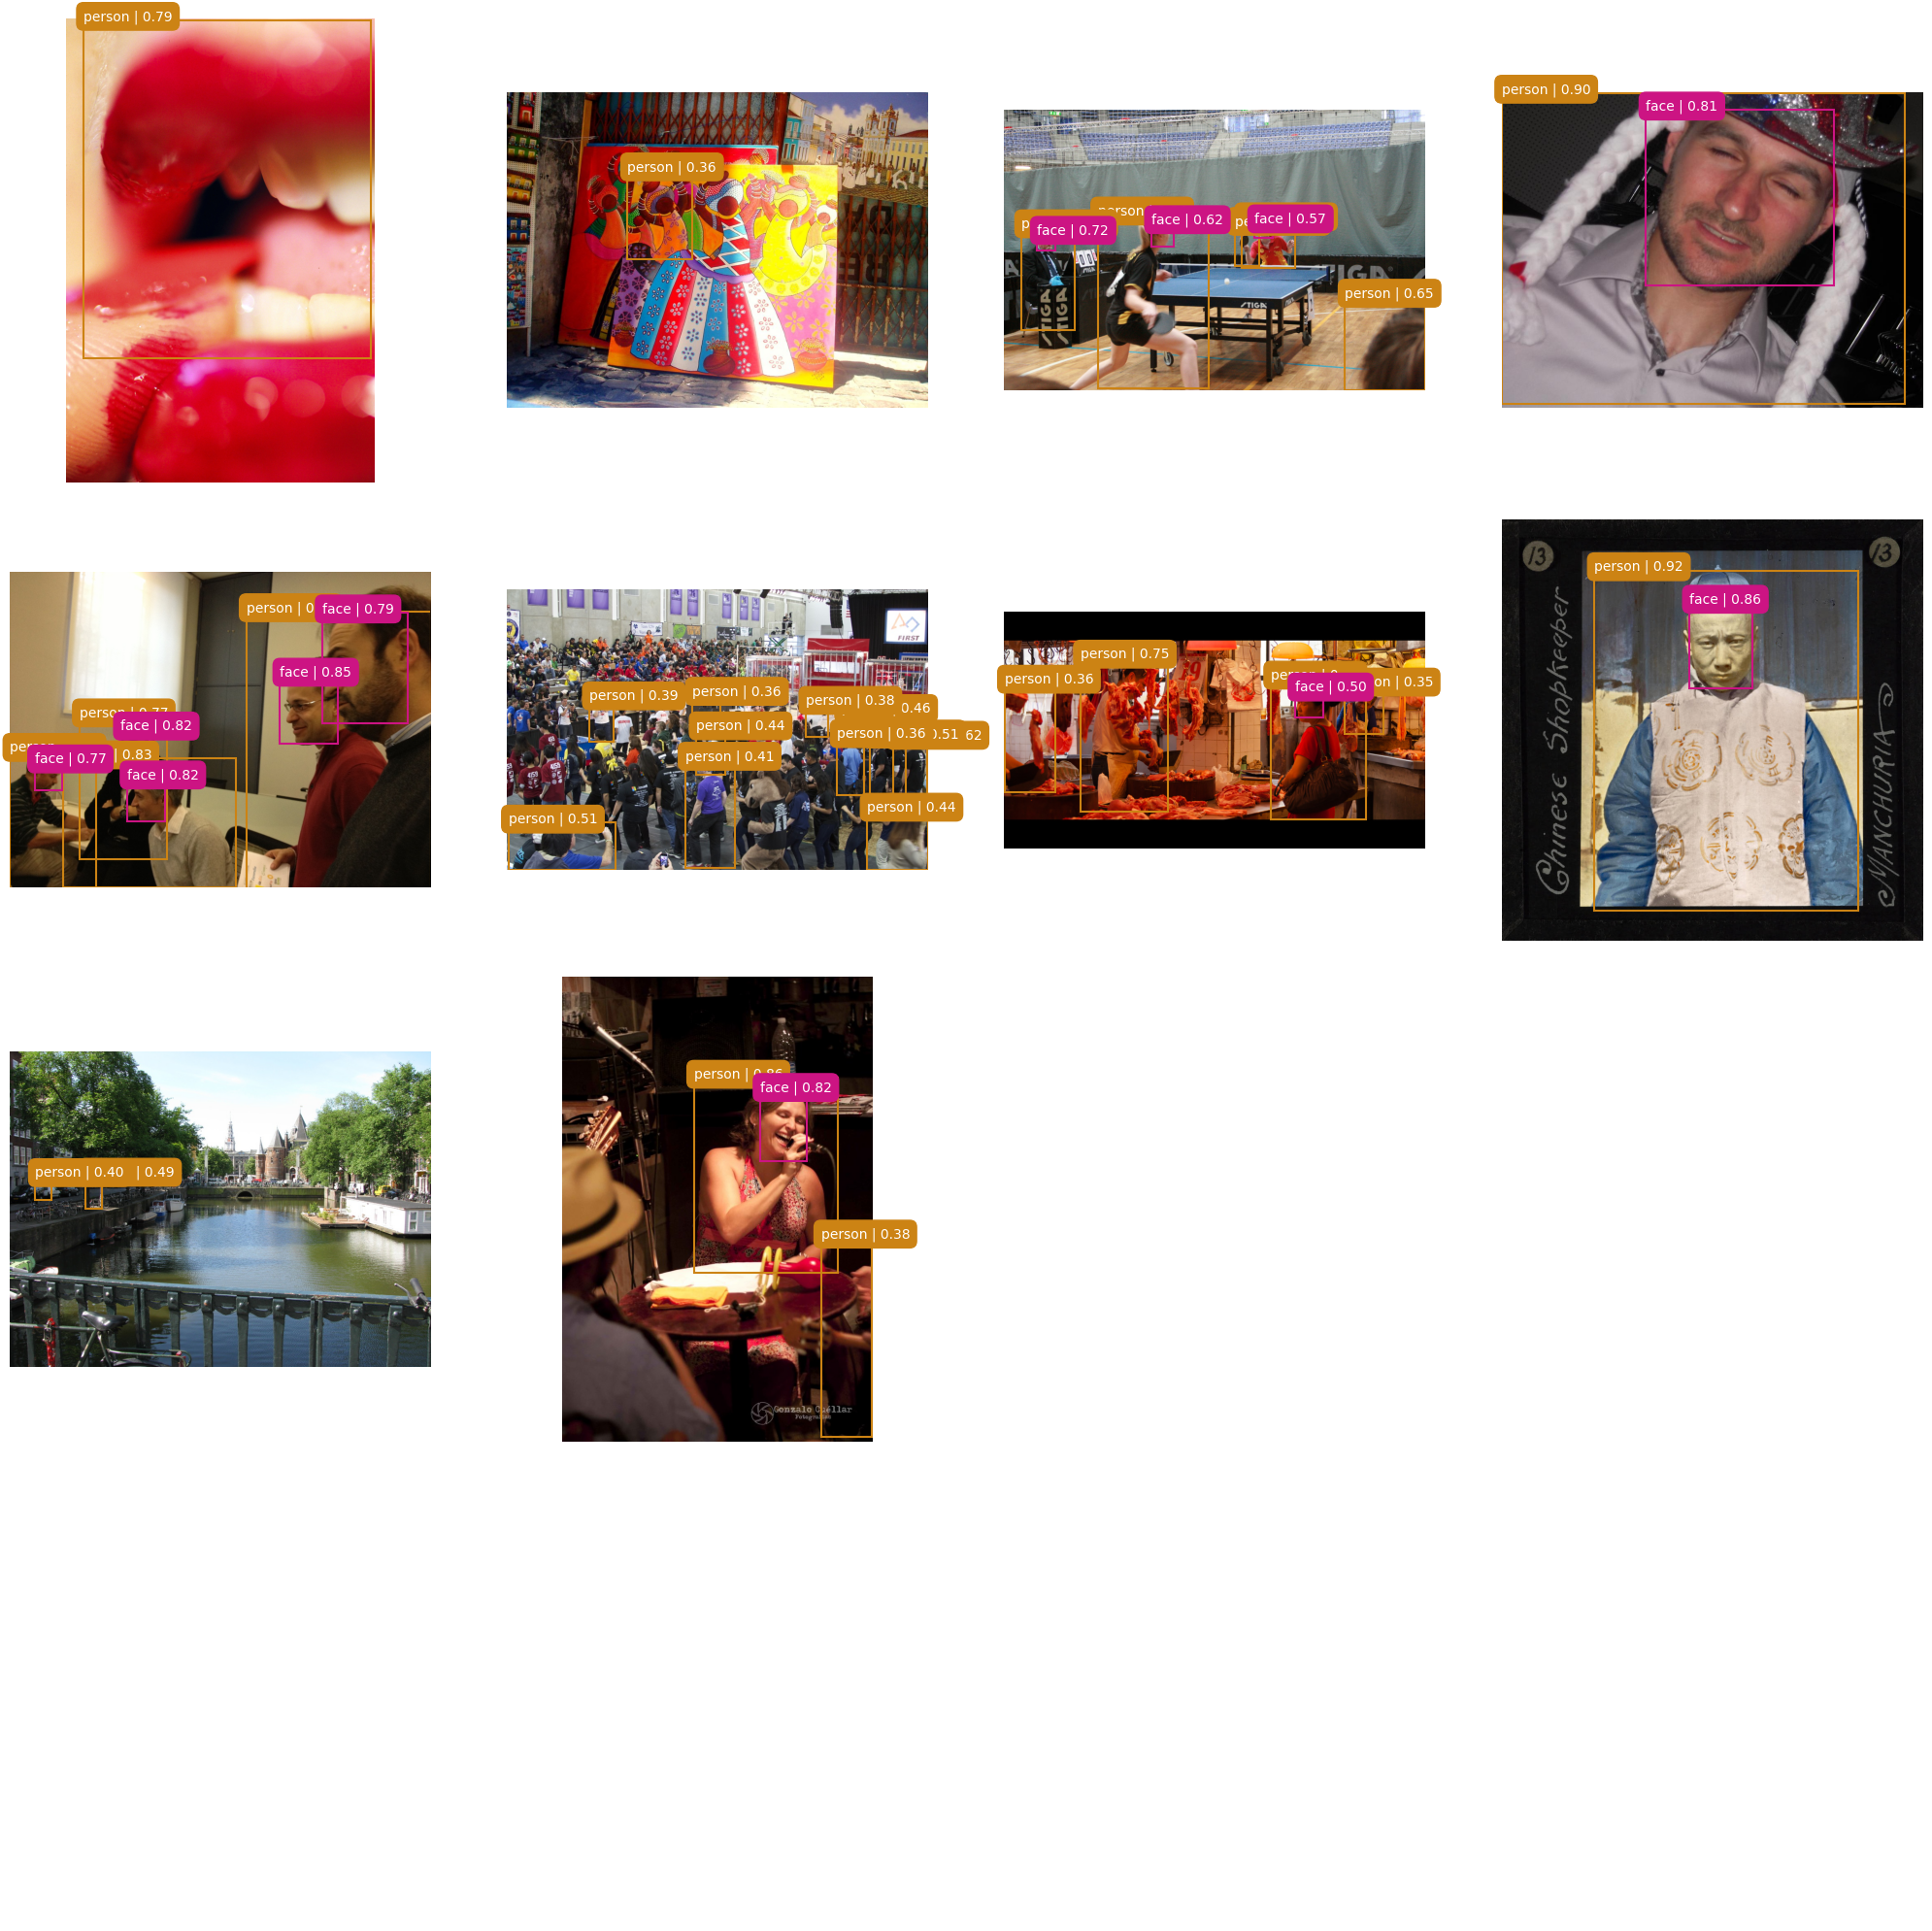

In [12]:
# sampled_df = agg_df.sample(10)

# for index, row in sampled_df.iterrows():
#     # Unpack lists and iterate through bounding boxes
#     filename = row['filename']
#     scores = row['score']
#     x1s = row['x1']
#     y1s = row['y1']
#     x2s = row['x2']
#     y2s = row['y2']
#     labels = row['label']

#     annotations = {
#         'labels': labels,
#         'scores': scores,
#         'boxes': list(zip(x1s, y1s, x2s, y2s))
#     }
    
#     annotate_image(filename, annotations)

# Assume agg_df is defined and sampled_df is your DataFrame of interest
sampled_df = agg_df.head(10)  # Sample 10 rows for plotting

# Calculate grid size
n_images = len(sampled_df)
grid_size = int(n_images**0.5) + 1  # Simple way to determine grid size

# Create figure and axes
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
axes = axes.flatten()  # Flatten to easily iterate over

for ax, (index, row) in zip(axes, sampled_df.iterrows()):
    filename = row['filename']
    img = plt.imread(filename)  # Assuming plt is imported from matplotlib
    annotations = {
        'labels': row['label'],
        'scores': row['score'],
        'boxes': list(zip(row['x1'], row['y1'], row['x2'], row['y2']))
    }
    
    annotate_image(ax, img, annotations)
    ax.axis('off')  # Hide axis

# Hide any unused subplots
for ax in axes[len(sampled_df):]:
    ax.axis('off')

plt.tight_layout()
plt.show()